
1. https://machinelearningmastery.com/regression-tutorial-keras-deep-learning-library-python/

2. https://stackoverflow.com/questions/44132652/keras-how-to-perform-a-prediction-using-kerasregressor

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [116]:
df = pd.read_csv('rnn_data_prajwal.csv', 
                 parse_dates=['DateTime'], index_col='DateTime')

In [117]:
df.head()

,Unnamed: 0,Fc,Ta,Ws,Fg,VPD,Fn,q,Ts,Sws
DateTime,,,,,,,,,,
2013-01-01 01:00:00,1,3.070399,26.998711,2.08,-20.984654,1.183521,-39.635899,0.014801,32.291790,0.032662
2013-01-01 01:30:00,2,2.948313,26.629910,2.47,-19.131921,1.067606,-35.979652,0.015045,32.036301,0.032636
2013-01-01 02:00:00,3,2.369790,26.294310,1.95,-18.278720,1.002275,-38.033844,0.015030,31.798710,0.032619
2013-01-01 02:30:00,4,0.105580,25.739479,1.55,-17.862080,0.927464,-41.878986,0.014810,31.572710,0.032582
2013-01-01 03:30:00,6,2.085828,24.548740,2.69,-21.647482,0.792163,-57.483334,0.014242,31.069750,0.032534


In [118]:
df.keys()

Index(['Unnamed: 0', 'Fc', 'Ta', 'Ws', 'Fg', 'VPD', 'Fn', 'q', 'Ts', 'Sws'], dtype='object')

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9015 entries, 2013-01-01 01:00:00 to 2014-01-01 00:00:00
Data columns (total 10 columns):
Unnamed: 0    9015 non-null int64
Fc            9015 non-null float64
Ta            9015 non-null float64
Ws            9015 non-null float64
Fg            9015 non-null float64
VPD           9015 non-null float64
Fn            9015 non-null float64
q             9015 non-null float64
Ts            9015 non-null float64
Sws           9015 non-null float64
dtypes: float64(9), int64(1)
memory usage: 774.7 KB


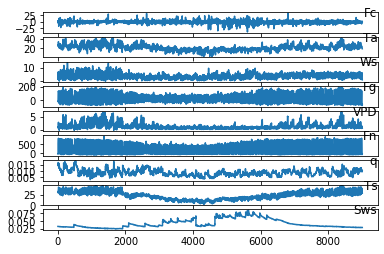

In [120]:
values = df.values
# specify columns to plot
groups = [1, 2, 3, 4, 5, 6, 7, 8, 9]
i = 1
# plot each column
plt.figure()
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group])
    plt.title(df.columns[group], y=0.5, loc='right')
    i += 1
plt.show()

In [121]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [122]:
Xvar = ['Ta', 'Ws', 'Fg', 'VPD', 'Fn', 'q', 'Ts', 'Sws']
yvar = 'Fc'

### Classical fit with random test/train split

In [123]:
X_train, X_test, y_train, y_test = train_test_split(df[Xvar], df[yvar], 
                                                    test_size=0.33, random_state=42)

In [124]:
scaler = StandardScaler()
Xtrain = scaler.fit_transform(X_train[Xvar])
reg = LinearRegression().fit(Xtrain, y_train)

Xtest = scaler.fit_transform(X_test[Xvar])
y_pred = reg.predict(Xtest)

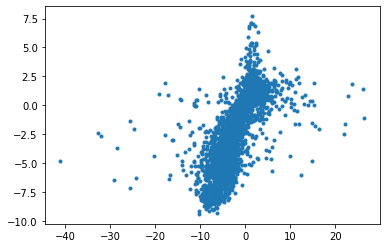

In [125]:
plt.plot(y_test, y_pred, '.')

In [126]:
mean_squared_error(y_test, y_pred)

11.266022762352394

### LSTM 

#### Data preparation

In [127]:
from sklearn.preprocessing import StandardScaler

In [128]:
df[Xvar + [yvar]].head()

,Ta,Ws,Fg,VPD,Fn,q,Ts,Sws,Fc
DateTime,,,,,,,,,
2013-01-01 01:00:00,26.998711,2.08,-20.984654,1.183521,-39.635899,0.014801,32.291790,0.032662,3.070399
2013-01-01 01:30:00,26.629910,2.47,-19.131921,1.067606,-35.979652,0.015045,32.036301,0.032636,2.948313
2013-01-01 02:00:00,26.294310,1.95,-18.278720,1.002275,-38.033844,0.015030,31.798710,0.032619,2.369790
2013-01-01 02:30:00,25.739479,1.55,-17.862080,0.927464,-41.878986,0.014810,31.572710,0.032582,0.105580
2013-01-01 03:30:00,24.548740,2.69,-21.647482,0.792163,-57.483334,0.014242,31.069750,0.032534,2.085828


In [129]:
# Regression Example With Boston Dataset: Baseline
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [130]:
# split into input (X) and output (Y) variables
n_train= 8500

train_df = df.iloc[:n_train]
test_df = df.iloc[n_train:] 

print(train_df.shape, test_df.shape)

X_train, y_train = train_df[Xvar], train_df[yvar]
X_test, y_test = test_df[Xvar], test_df[yvar]

print(X_train.shape, y_train.shape)
print(X_train.keys())

scaler1 = StandardScaler()
X_train_scaled = scaler1.fit_transform(X_train)
scaler2 = StandardScaler()
y_train_scaled = scaler2.fit_transform(y_train.values.reshape(-1,1))
scaler3 = StandardScaler()
X_test_scaled = scaler3.fit_transform(X_test)
scaler4 = StandardScaler()
y_test_scaled = scaler4.fit_transform(y_test.values.reshape(-1,1))

(8500, 10) (515, 10)
(8500, 8) (8500,)
Index(['Ta', 'Ws', 'Fg', 'VPD', 'Fn', 'q', 'Ts', 'Sws'], dtype='object')


In [131]:
# define base model
def baseline_model(input_dim):
    # create model
    model = Sequential()
    model.add(Dense(15, input_dim=input_dim, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])
    return model

# define deep model
def deeper_model(input_dim):
    # create model
    model = Sequential()
    model.add(Dense(15, input_dim=input_dim, kernel_initializer='normal', activation='relu'))
    model.add(Dense(8, kernel_initializer='normal', activation='relu'))
    model.add(Dense(6, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])
    return model

# define wider model
def wider_model(input_dim):
    # create model
    model = Sequential()
    model.add(Dense(30, input_dim=input_dim, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])
    return model

base_model = baseline_model(input_dim=8)
deep_model = deeper_model(input_dim=8)
wide_model = wider_model(input_dim=8)

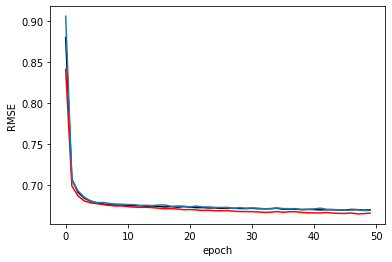

In [132]:
history_base = base_model.fit(X_train_scaled, y_train_scaled, epochs=50, 
                    batch_size=50, verbose=None)
history_deep = deep_model.fit(X_train_scaled, y_train_scaled, epochs=50, 
                    batch_size=50, verbose=None)
history_wide = wide_model.fit(X_train_scaled, y_train_scaled, epochs=50, 
                    batch_size=50, verbose=None)
plt.plot(np.sqrt(history_base.history['mse']), color='k')
plt.plot(np.sqrt(history_wide.history['mse']), color='r')
plt.plot(np.sqrt(history_deep.history['mse']))
plt.xlabel('epoch')
plt.ylabel('RMSE')
plt.show()

In [133]:
y_pred_deep_baseline_scaled = base_model.predict(X_test_scaled)
y_pred_deep_baseline = scaler4.inverse_transform(y_pred_deep_baseline_scaled)

In [134]:
y_pred_deep_deep_scaled = deep_model.predict(X_test_scaled)
y_pred_deep_deep = scaler4.inverse_transform(y_pred_deep_deep_scaled)

In [135]:
y_pred_deep_wide_scaled = wide_model.predict(X_test_scaled)
y_pred_deep_wide = scaler4.inverse_transform(y_pred_deep_wide_scaled)

### Training

### Classical Fit

#### Linear Regression

In [136]:
reg = LinearRegression().fit(X_train_scaled, y_train_scaled)

y_pred_linreg_scaled = reg.predict(X_test_scaled)
y_pred_linreg = scaler4.inverse_transform(y_pred_linreg_scaled)

#### Random Forrest

In [137]:
from sklearn.ensemble import RandomForestRegressor as RFE

In [138]:
reg = RFE(n_estimators=500, 
          max_depth = 10, n_jobs=-1).fit(X_train, y_train)
y_pred_rfe = reg.predict(X_test)

### Diagnostic Report/Plot

RMSE linear reg:  2.137856251963139
RMSE RF reg:  1.5988627252245817
RMSE DL baseline:  1.9029086144028566
RMSE DL deep:  1.848425673824111
RMSE DL wide:  1.9740717575438196


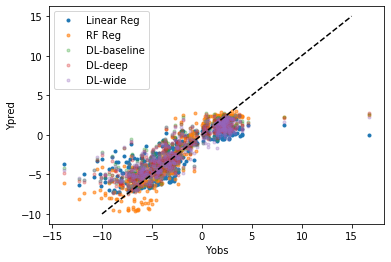

In [139]:
plt.plot(y_test, y_pred_linreg, '.', label='Linear Reg')
plt.plot(y_test, y_pred_rfe, '.', label='RF Reg', alpha=0.6)
plt.plot(y_test, y_pred_deep_baseline, '.', label='DL-baseline', alpha=0.3)
plt.plot(y_test, y_pred_deep_deep, '.', label='DL-deep', alpha=0.3)
plt.plot(y_test, y_pred_deep_wide, '.', label='DL-wide', alpha=0.3)
plt.plot([-10,15], [-10,15], '--k')
plt.xlabel('Yobs')
plt.ylabel('Ypred')
plt.legend()
print("RMSE linear reg: ", np.sqrt(mean_squared_error(y_test, y_pred_linreg)))
print("RMSE RF reg: ", np.sqrt(mean_squared_error(y_test, y_pred_rfe)))
print("RMSE DL baseline: ", np.sqrt(mean_squared_error(y_test, y_pred_deep_baseline)))
print("RMSE DL deep: ", np.sqrt(mean_squared_error(y_test, y_pred_deep_deep)))
print("RMSE DL wide: ", np.sqrt(mean_squared_error(y_test, y_pred_deep_wide)))